In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/cell_samples.csv")
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(699, 11)

In [4]:
df.count() # column wise data

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [5]:
df["Class"].value_counts() # How many different types of entry 

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

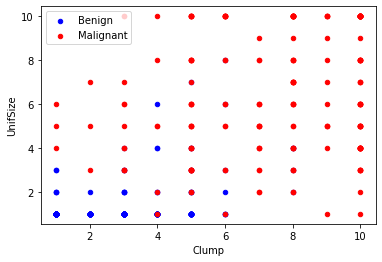

In [6]:
# Plotting class distribution against the clump and unifsize
benign_df = df[df["Class"]==2][0:200]
malignant_df = df[df["Class"]==4][0:200]

axes = benign_df.plot(kind="scatter", x = "Clump", y = "UnifSize", color ="blue", label="Benign")
malignant_df.plot(kind="scatter", x = "Clump", y = "UnifSize", color ="red", label="Malignant", ax = axes)

In [7]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int32
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 61.4 KB


In [8]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
# Extracting feature and class data
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
y = np.asarray(df['Class'])

In [10]:
# Splitting data set for training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =4)
X_train.shape
y_train.shape

(546,)

In [11]:
# Training the classifier
from sklearn import svm
classifier = svm.SVC(kernel='linear', gamma ='auto', C= 2)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)

In [12]:
# Evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

